In [3]:
#使用Scikit-learn内置的make_moons生成非线性可分数据
#n_samples：样本量（建议1000-2000，模拟真实数据规模）
#noise：噪声水平（0.1-0.3增加分类难度）
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

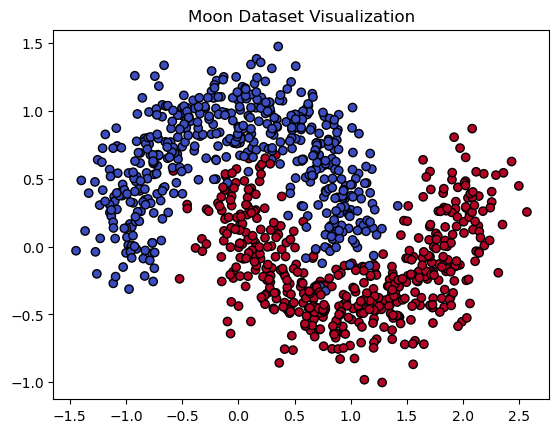

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Moon Dataset Visualization")
plt.show()

In [27]:
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
#训练不同核函数的SVM模型 核方法
#线性核（对比基线）
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=10)
svm_linear.fit(X_scaled, y)

SVC(C=10, kernel='linear')

In [49]:
#高斯核(RBF)(最常用)
svm_rbf = SVC(kernel='rbf', gamma=1, C=10)
svm_rbf.fit(X_scaled, y)

SVC(C=10, gamma=1)

In [51]:
#多项式核
svm_poly = SVC(kernel='poly', degree=3, coef0=1, C=10)
svm_poly.fit(X_scaled, y)

SVC(C=10, coef0=1, kernel='poly')

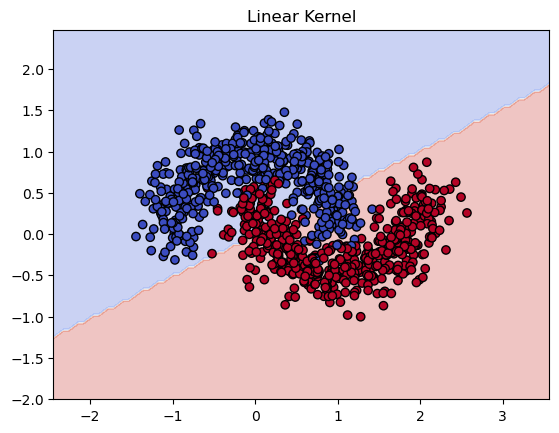

In [53]:
#绘制决策边界图，直观展示处理复杂边界的能力
import numpy as np
num_points = 100  # 每维网格点数
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 第一列范围
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 第二列范围
xx, yy = np.meshgrid(   # 在2个特征的定义域内生成网格
    np.linspace(x_min, x_max, num_points),  # 等间距划分
    np.linspace(y_min, y_max, num_points)
)
Z1 = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Linear Kernel')
plt.show()

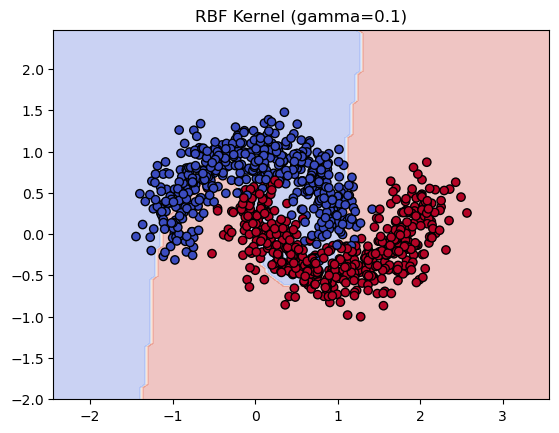

In [55]:
Z2 = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('RBF Kernel (gamma=0.1)')
plt.show()

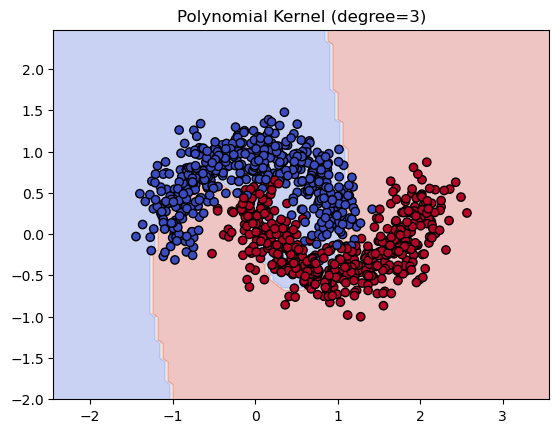

In [57]:
Z3 = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z3, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Polynomial Kernel (degree=3)')
plt.show()

In [59]:
#评估指标（准确率、F1值）
from sklearn.metrics import accuracy_score, f1_score
for name, model in [("Linear", svm_linear), ("RBF", svm_rbf), ("Poly", svm_poly)]:
    y_pred = model.predict(X_scaled)
    print(f"{name} Kernel - Accuracy: {accuracy_score(y, y_pred):.4f}, F1: {f1_score(y, y_pred):.4f}")

Linear Kernel - Accuracy: 0.8660, F1: 0.8665
RBF Kernel - Accuracy: 0.9780, F1: 0.9781
Poly Kernel - Accuracy: 0.9770, F1: 0.9771


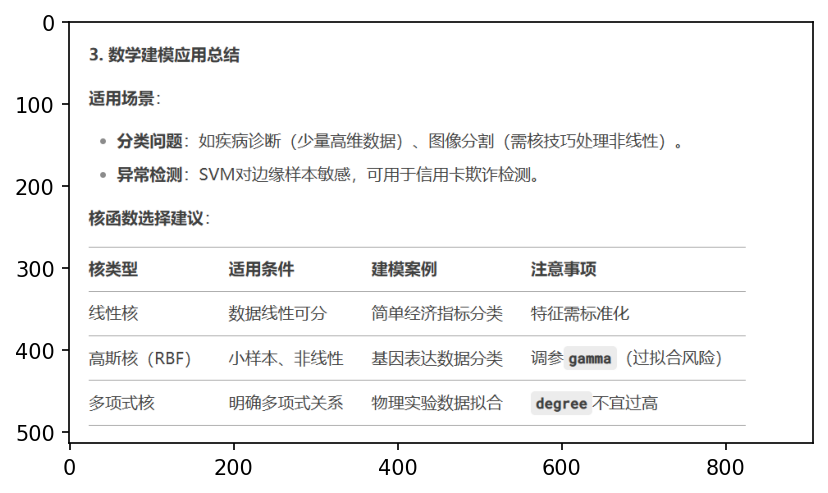

In [61]:
img = plt.imread('SVM.png')
plt.figure(dpi=150)
plt.imshow(img)

In [63]:
#网格搜索 找到最优方案 优化C（惩罚系数）、gamma（RBF核宽度）、kernel类型，提升模型性能。
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 20],
             'gamma': [ 0.1, 1, 5,],
             'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(kernel='rbf'),
                    param_grid,
                    cv=5,
                    n_jobs=-1)
grid.fit(X_scaled, y)
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [46]:
#写作要点
#对比不同核函数效果时，使用表格或子图展示决策边界。
#强调SVM在小样本和高维数据中的优势（如与神经网络对比）